# Digital Transformation [Banking]


## Business Objective

Bank XYZ has a growing customer base where the majority of them are liability customers (depositors) vs. borrowers (asset customers). The bank is interested in expanding the borrower’s base rapidly to bring in more business via loan interests.
A campaign that the bank ran in the last quarter showed an average single-digit conversion rate. In the last town hall, the marketing head mentioned that digital transformation is the core strength of the business strategy, how to devise effective campaigns with better target marketing to increase the conversion ratio to double-digit with the same budget as per the last campaign.
As a data scientist, you are asked to develop a machine learning model to identify potential borrowers to support focused marketing.

## Importing libraries

In [1]:
import pandas as pd #data manipulation
import numpy as np #mathematical operations
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
import seaborn as sns #visualisation
pd.set_option('display.max_rows',None) #display max rows
pd.set_option('display.max_columns',None) #display max columns
import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
data1=pd.read_csv('Data1.csv') #read data1
data2=pd.read_csv('Data2.csv') #read data2

In [3]:
data1.head() #top 5 values of data1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [4]:
data1.shape

(5000, 8)

In [5]:
data2.head()  #top 5 values of data2

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [6]:
data=data2.merge(data1,how='left',on='ID') #Merging data2 and data1 on common column 'ID'

In [7]:
data2.shape #Rows and Columns

(5000, 7)

In [8]:
data.head() #top 5 values after merging

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,0,1,0,0,0,NaN,25,1,49,91107,4,1.6,1
1,2,0,1,0,0,0,NaN,45,19,34,90089,3,1.5,1
2,3,0,0,0,0,0,NaN,39,15,11,94720,1,1.0,1
3,4,0,0,0,0,0,NaN,35,9,100,94112,1,2.7,2
4,5,0,0,0,0,1,NaN,35,8,45,91330,4,1.0,2


In [9]:
data.info() #checking type of data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
 7   Age                  5000 non-null   int64  
 8   CustomerSince        5000 non-null   int64  
 9   HighestSpend         5000 non-null   int64  
 10  ZipCode              5000 non-null   int64  
 11  HiddenScore          5000 non-null   int64  
 12  MonthlyAverageSpend  5000 non-null   float64
 13  Level                5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [10]:
data.describe() #calculating all aggrigate operations

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,4980.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000
std,1443.520003,101.713802,0.305809,0.23825,0.490589,0.455637,0.295149,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000
25%,1250.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000
50%,2500.500000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000
75%,3750.250000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000
max,5000.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000


In [11]:
data.shape #checking shpe of dataframe

(5000, 14)

In [12]:
data.isnull().sum() #checking null values

ID                      0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
dtype: int64

In [13]:
data['LoanOnCard'].fillna(data['LoanOnCard'].median(),inplace=True) #imuting null values

In [14]:
data.head() #top 5 values

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,0,1,0,0,0,0.0,25,1,49,91107,4,1.6,1
1,2,0,1,0,0,0,0.0,45,19,34,90089,3,1.5,1
2,3,0,0,0,0,0,0.0,39,15,11,94720,1,1.0,1
3,4,0,0,0,0,0,0.0,35,9,100,94112,1,2.7,2
4,5,0,0,0,0,1,0.0,35,8,45,91330,4,1.0,2


In [15]:
data.isnull().sum() #checking null values

ID                     0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
dtype: int64

In [16]:
data.duplicated().sum() #checking for duplicated values

0

In [17]:
data.drop(['ID','ZipCode','Age','InternetBanking','FixedDepositAccount'],axis=1,inplace=True) #dropping unnecessary features

## Exploratory Data Analysis

### Heat Map

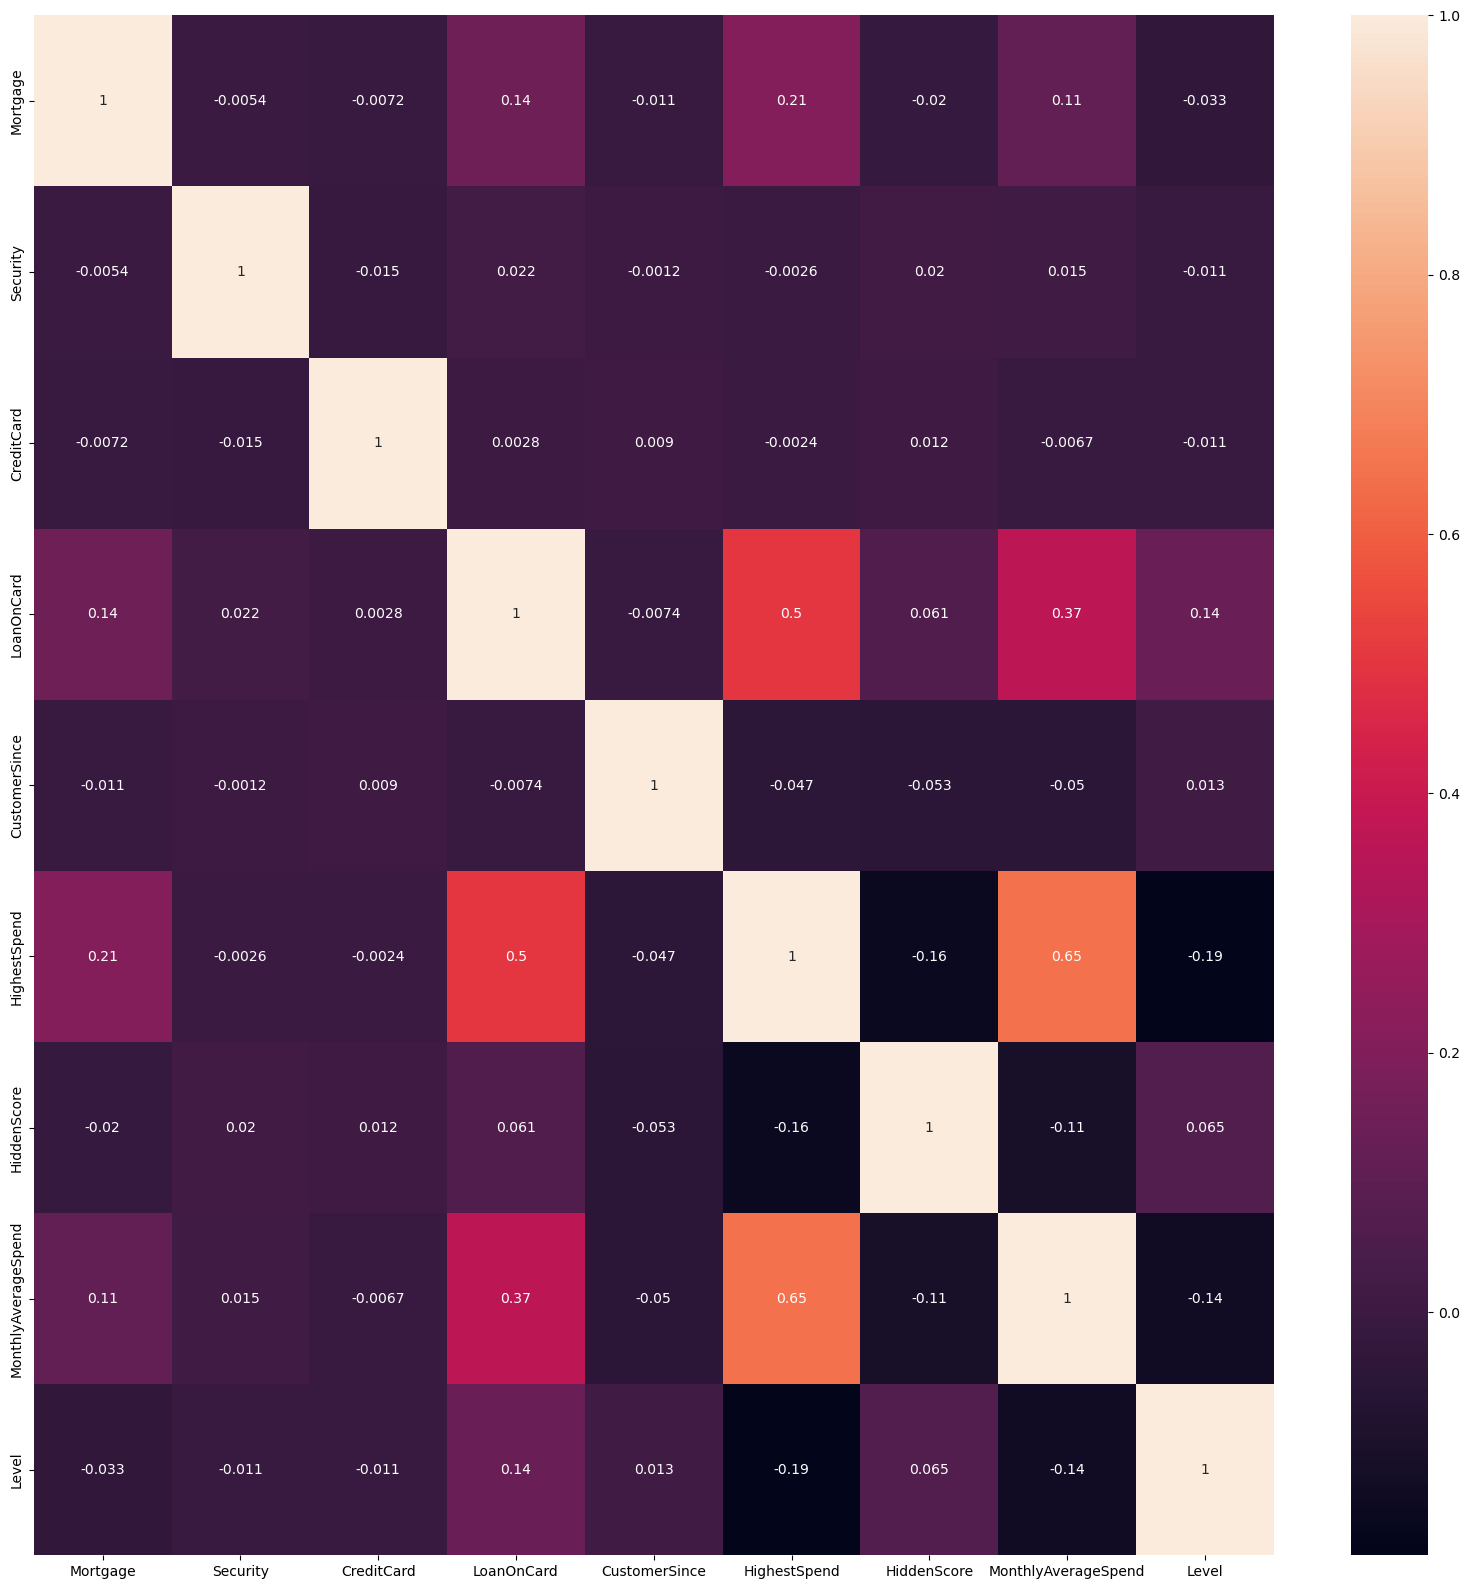

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

We observe from heat map that,

1.HighestSpend is moderatly corelated with LoanOnCard and MonthlyAverageSpend.

### Count Plot

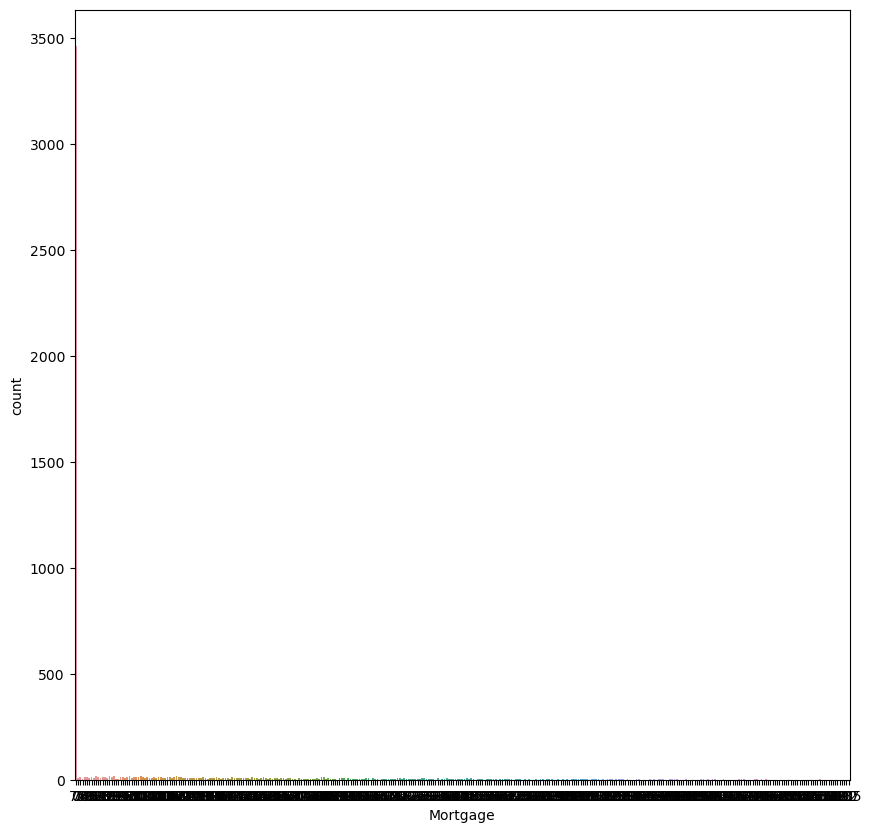

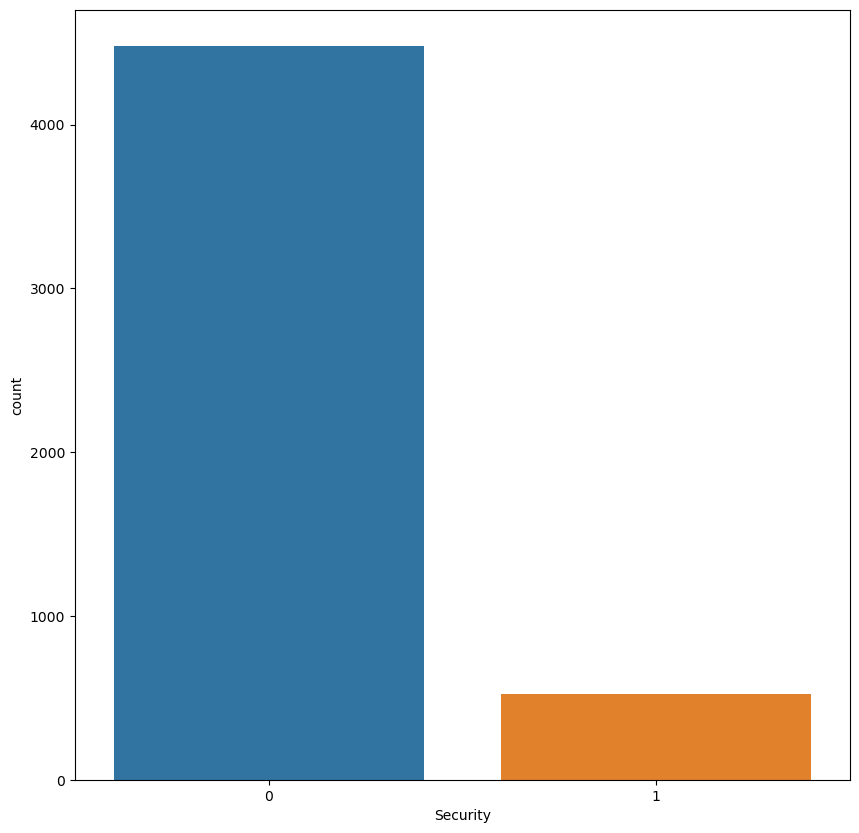

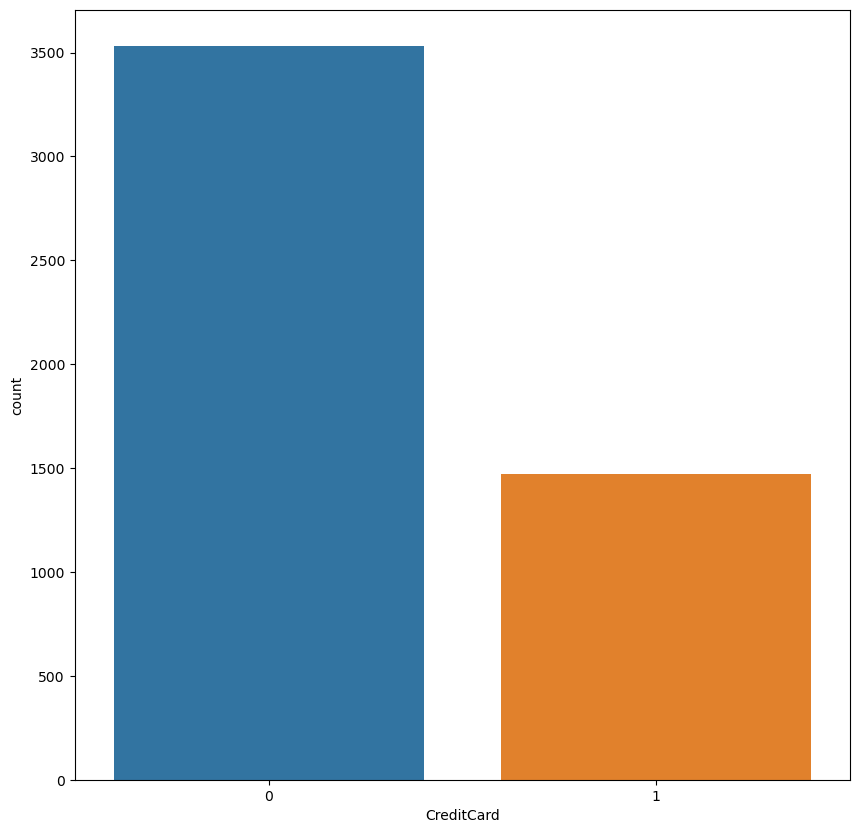

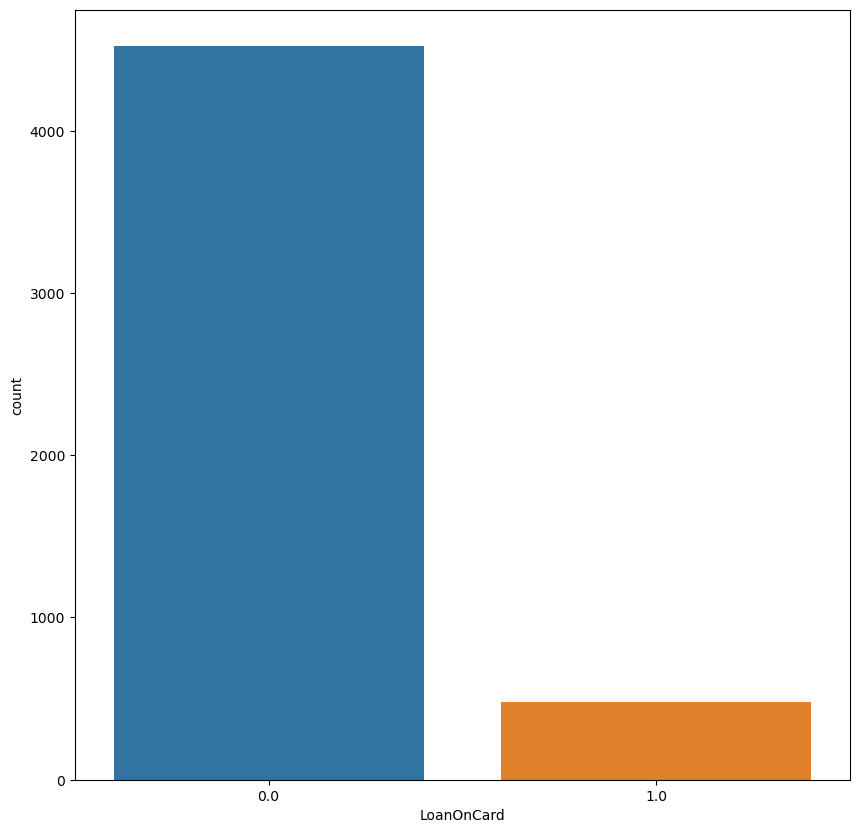

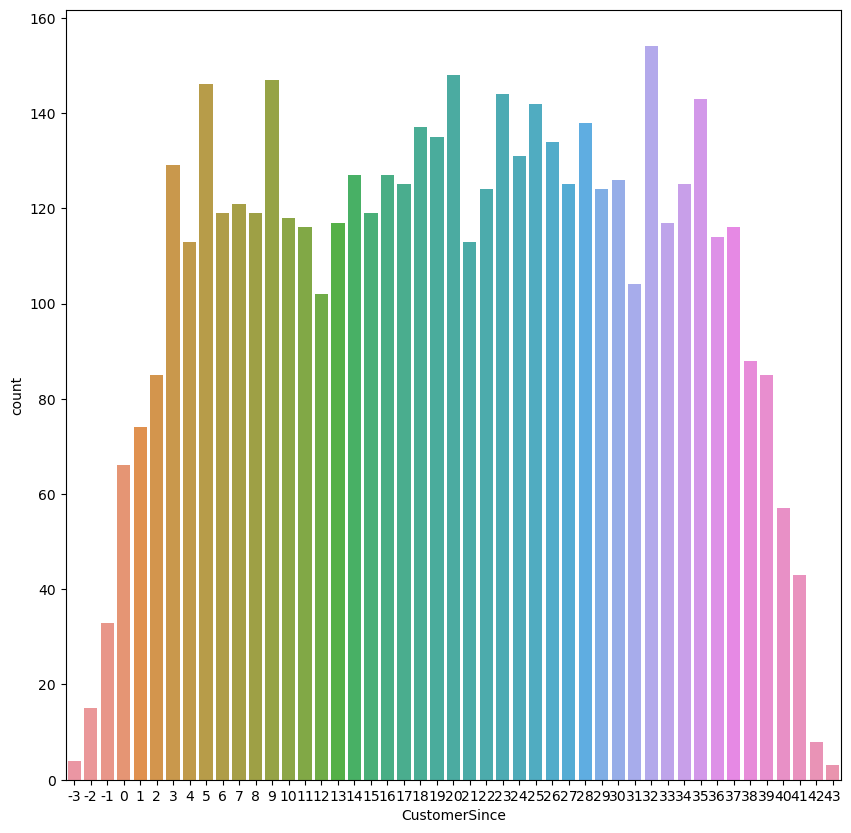

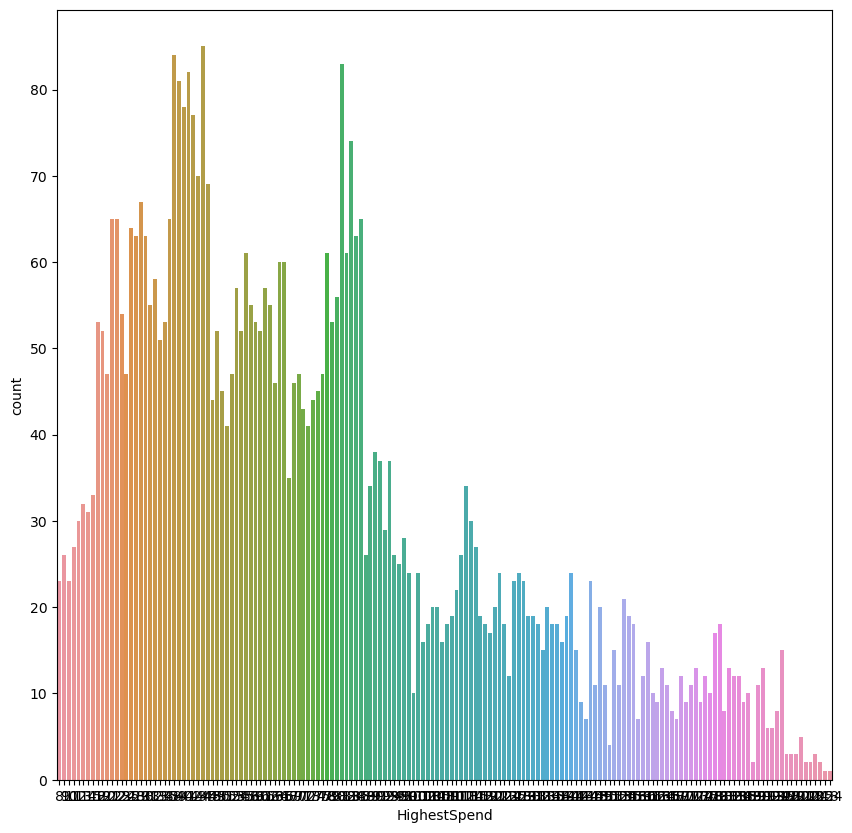

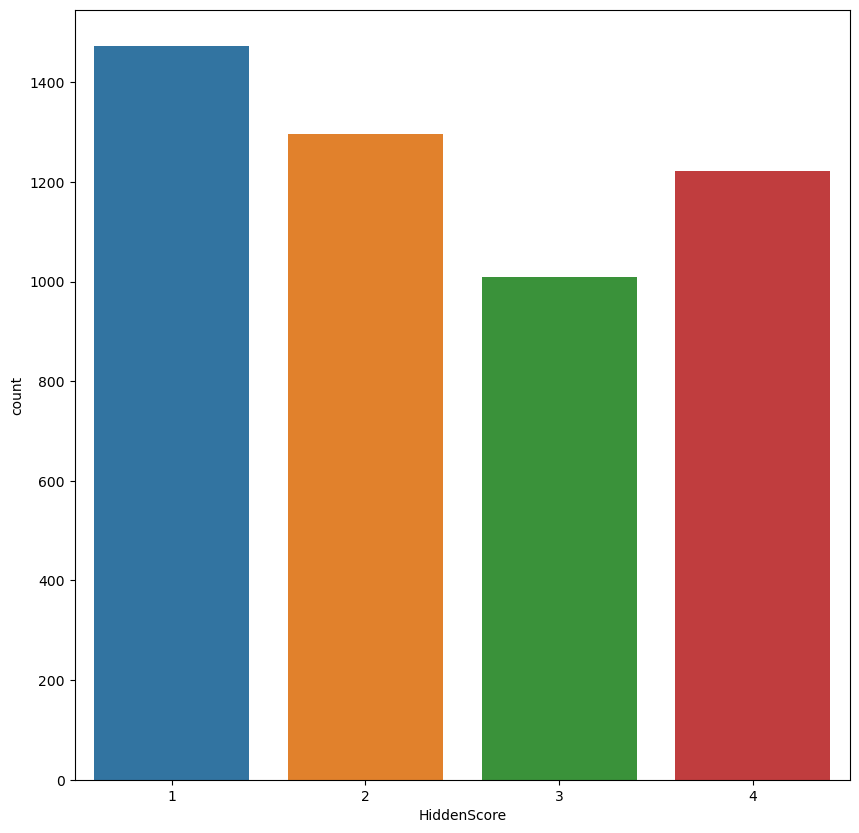

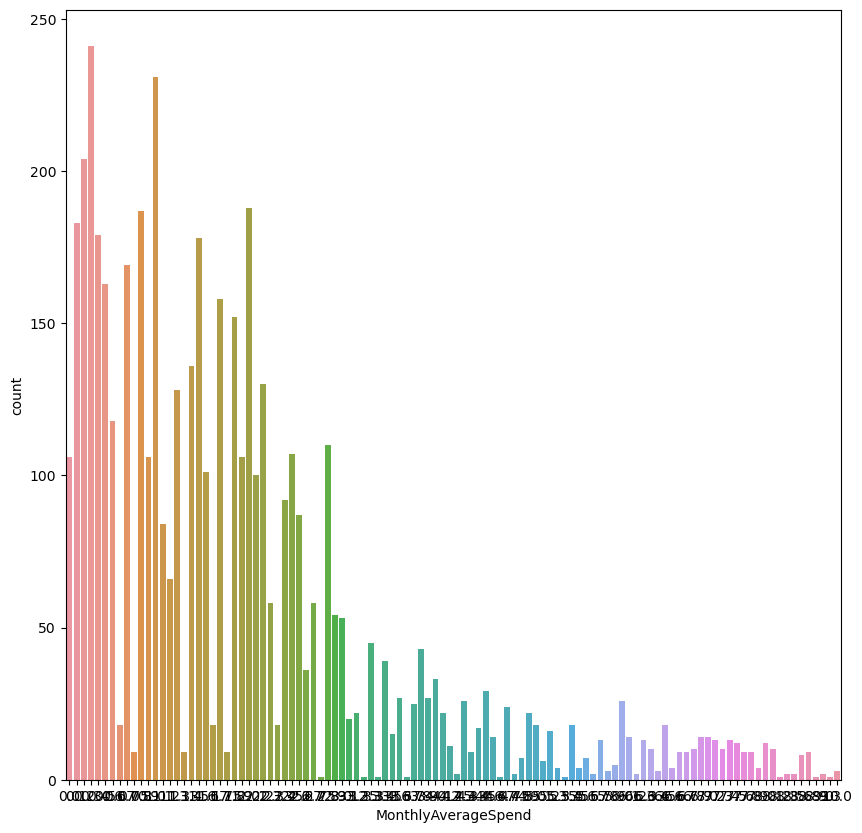

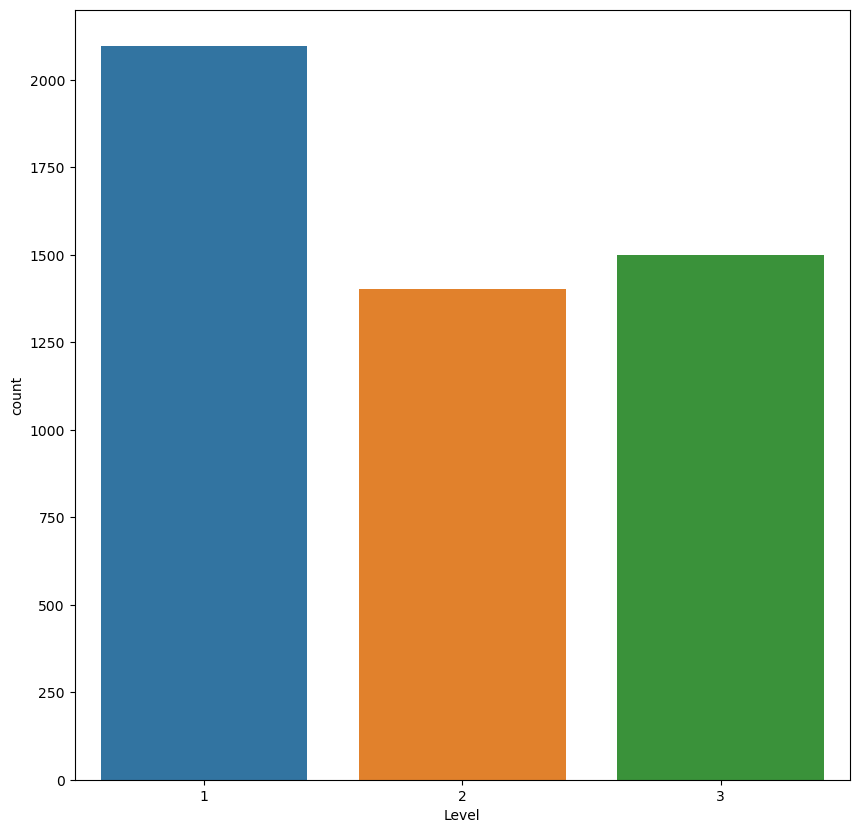

In [19]:
for i in data.columns:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, data=data)
    plt.show()

From the above visualisation we observe that,

1.Majority of people don't have security(i.e 4000+).

2.3500 people don,t have Creditcard.

4.4000+ people don't have Loanoncard.

5.Hidden Score count for each category,

a)1 count is 1400+ 

b)2 count is 1200+

c)3 count is 1000 

d)4 is 1200

6)Level count for each category,

a)1 count is 2000+.

b)2 count is 1250+.

c)3 xount is 1500.

### Box Plot

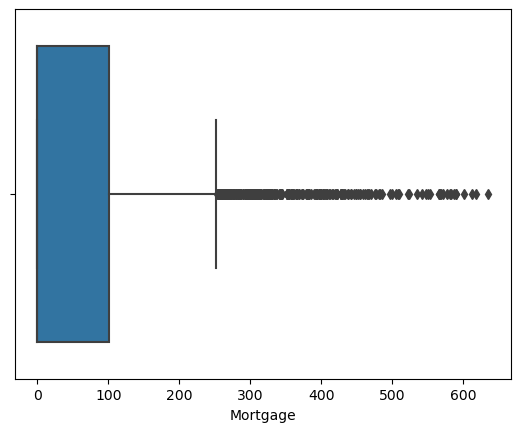

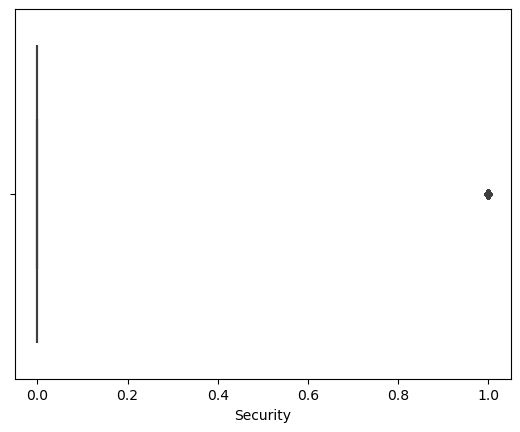

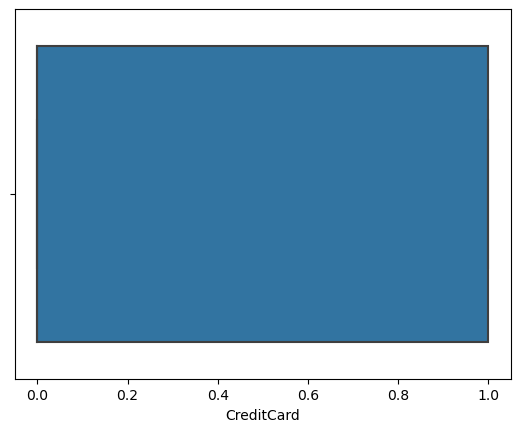

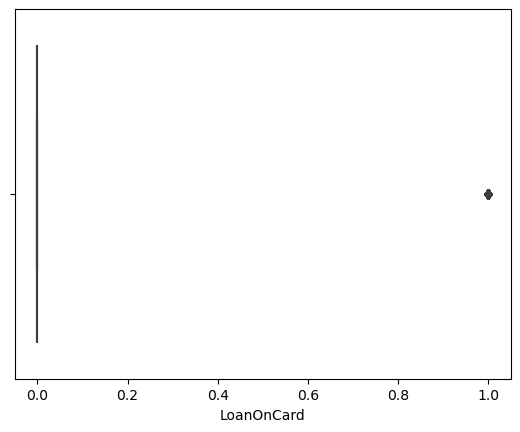

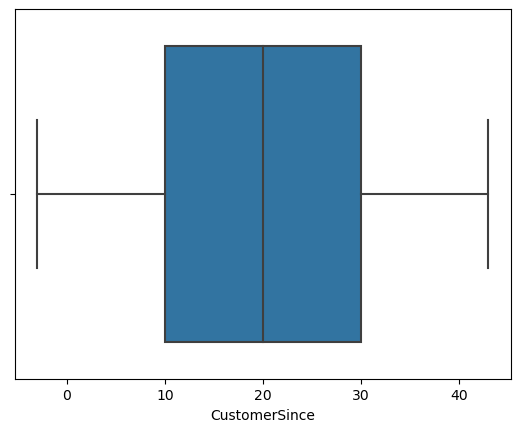

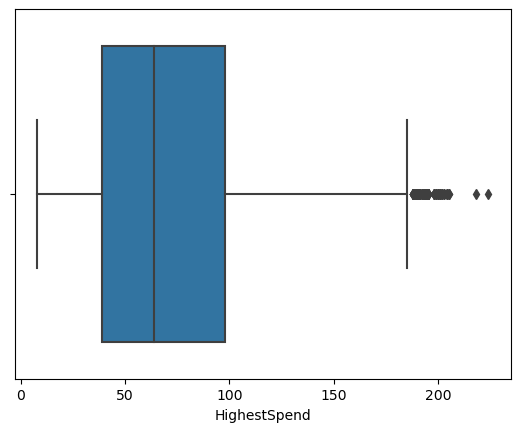

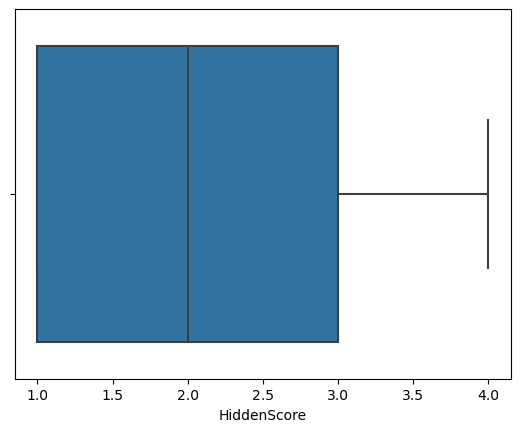

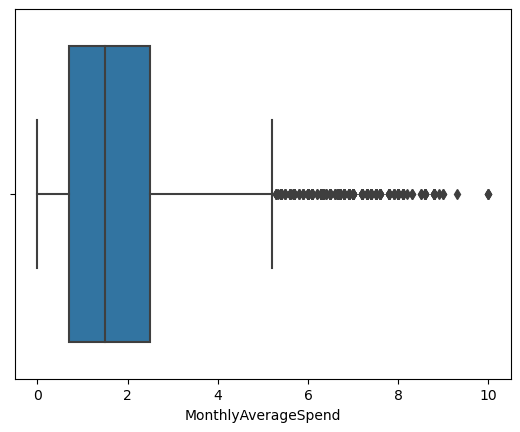

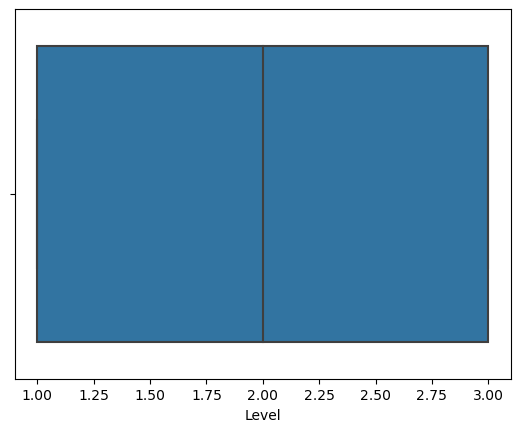

In [20]:
#plotting boxplot for each feature
for i in data.columns:
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

From the above visualisation we observe that,

1.Mortgage,HighestSpend,MonthlyAverageSpend has outliers.


### Capping for outliers

In [21]:
# Define the columns with outliers
columns_with_outliers=['Mortgage','HighestSpend','MonthlyAverageSpend']
# Loop through each column and cap the outliers
for column_name in columns_with_outliers:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    data[column_name] = data[column_name].clip(lower_bound, upper_bound)

In [22]:
data.head()

,Mortgage,Security,CreditCard,LoanOnCard,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level
0,0.0,1,0,0.0,1,49.0,4,1.6,1
1,0.0,1,0,0.0,19,34.0,3,1.5,1
2,0.0,0,0,0.0,15,11.0,1,1.0,1
3,0.0,0,0,0.0,9,100.0,1,2.7,2
4,0.0,0,1,0.0,8,45.0,4,1.0,2


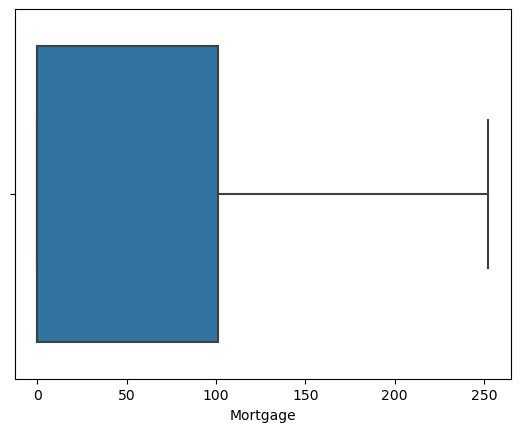

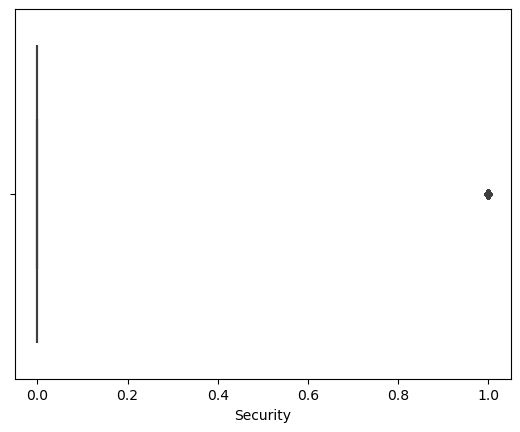

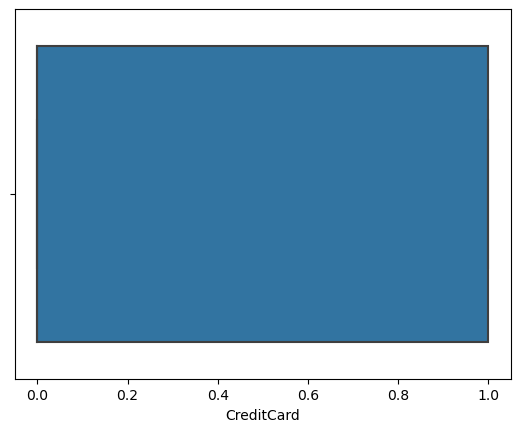

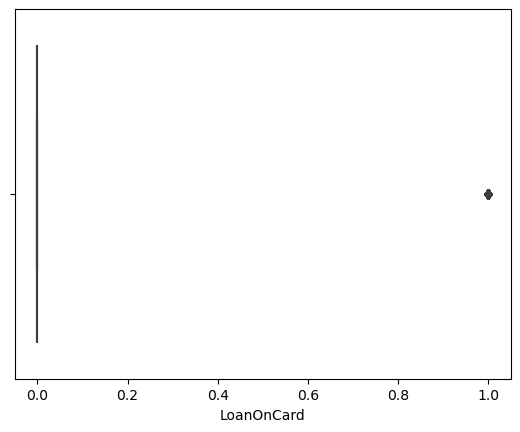

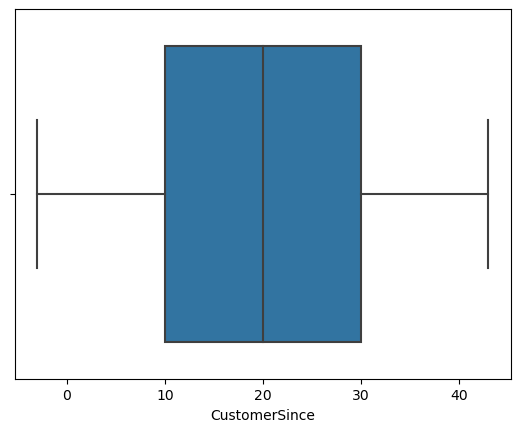

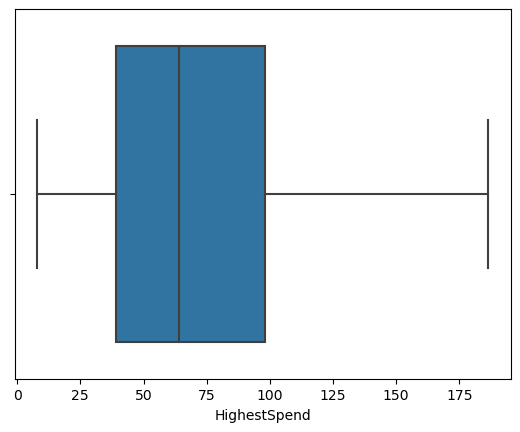

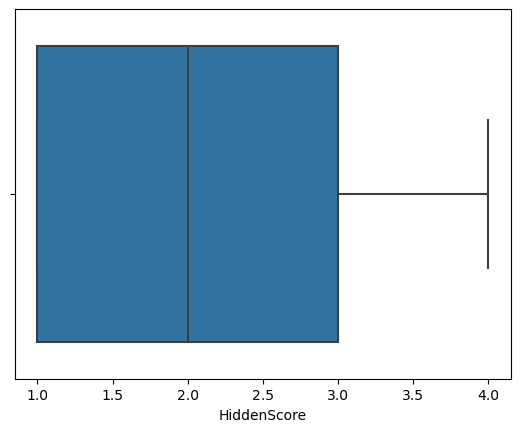

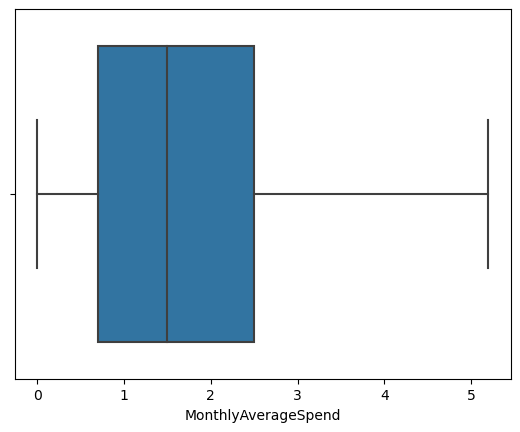

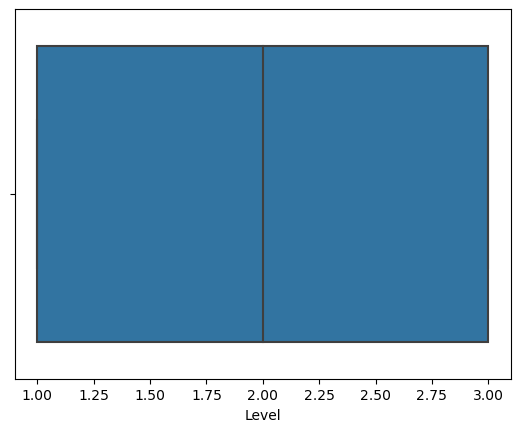

In [23]:
#plotting boxplot for each feature
for i in data.columns:
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

we observe that,There are no outliers after capping.

### Hist Plot

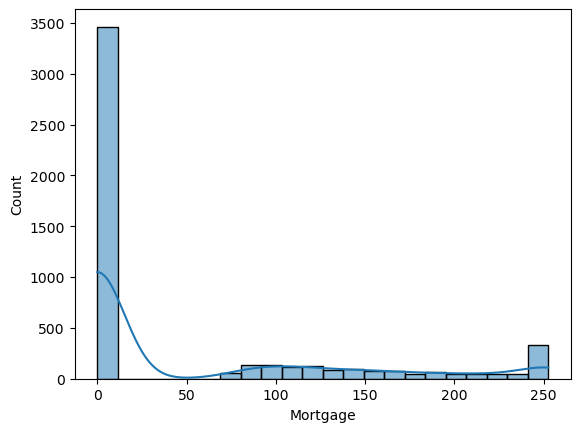

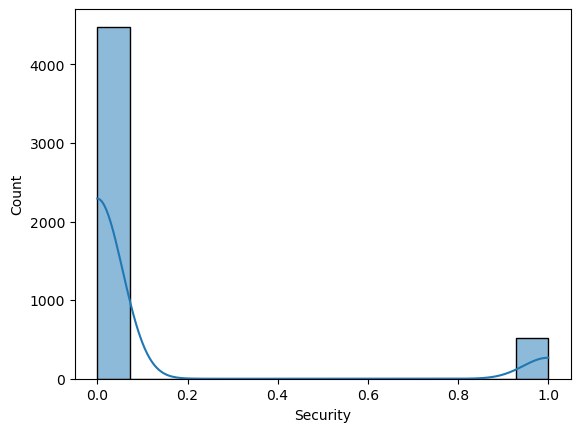

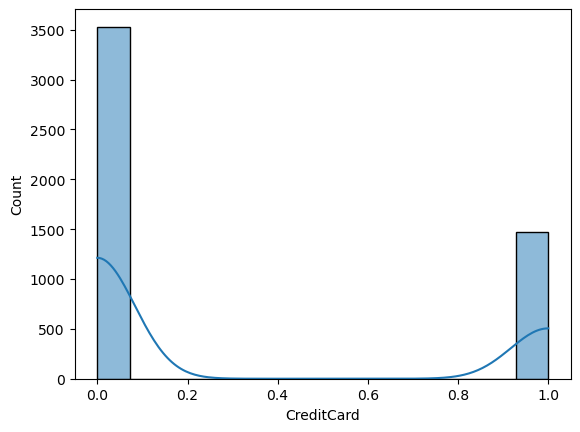

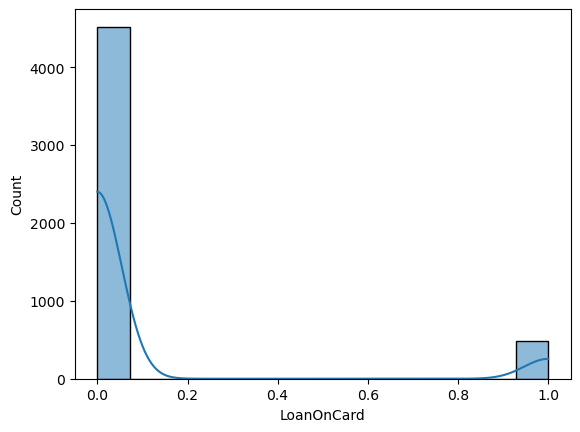

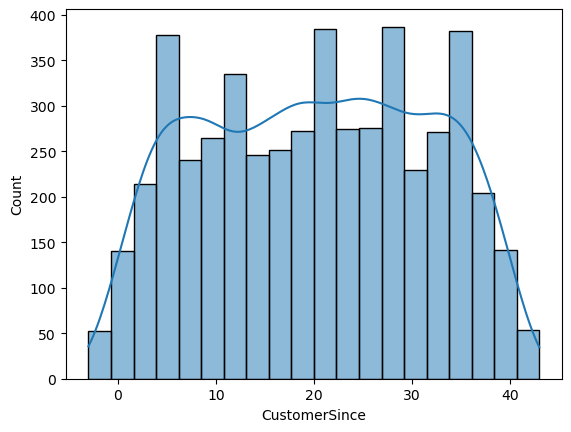

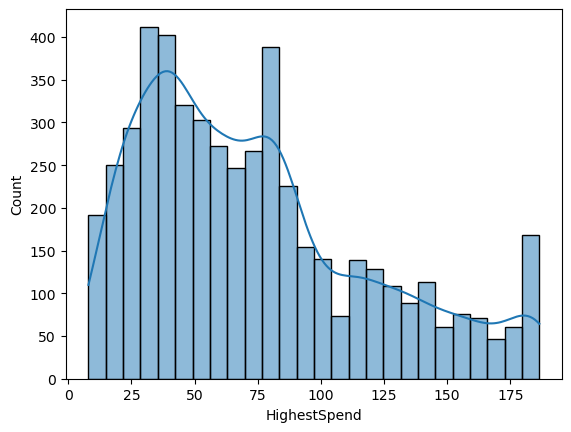

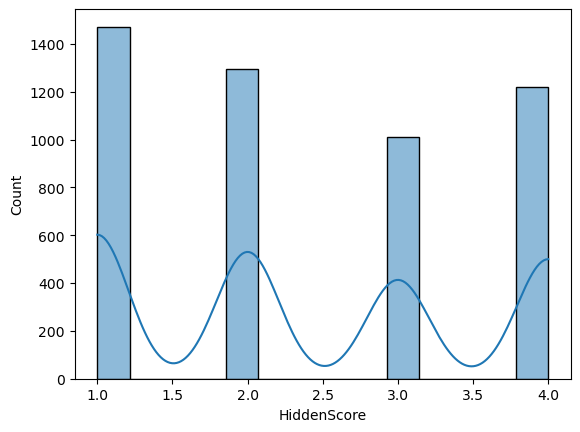

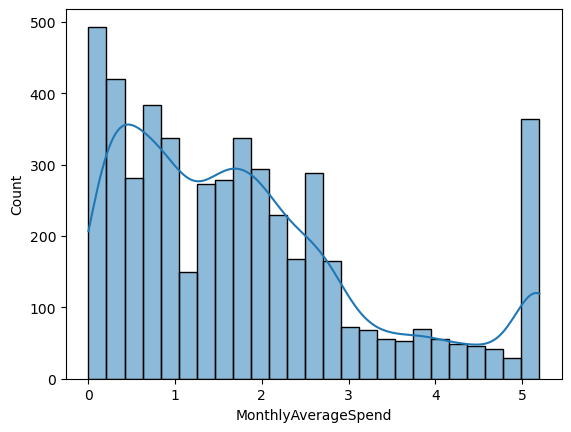

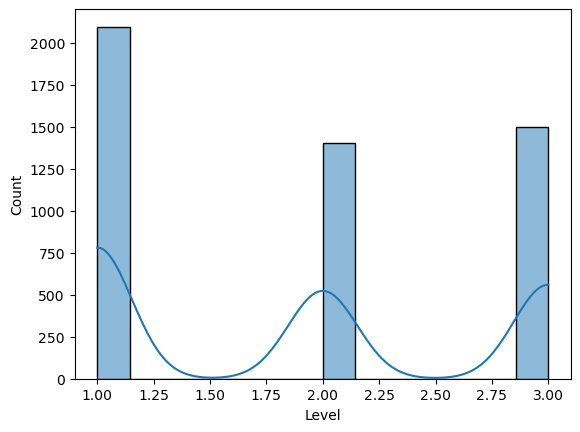

In [24]:
#plotting histplot for each feature
for i in data.columns:
    sns.histplot(data[i],kde=True)
    plt.show()

from above hist plot we observe that
1.Customersince is normally distrubuted.
2.HighestSpend,MonthlyAverageSpend is right skewed.

In [25]:
#checking unique values in each feature
for i in data.columns:
    print("\n")
    print(i)
    print(data[i].unique())



Mortgage
[  0.  155.  104.  134.  111.  252.5 163.  159.   97.  122.  193.  198.
 153.  211.  207.  240.  112.  132.  118.  174.  126.  236.  166.  136.
 103.  101.  251.  161.  149.  188.  116.  135.  244.  164.   81.  140.
  95.   89.   90.  105.  100.  209.  249.   91.   98.  145.  150.  169.
  99.   78.  113.  117.  121.  138.   77.  158.  109.  131.   88.  129.
 196.  123.  167.  190.  248.   82.  185.  148.  175.  147.  220.  133.
 182.  125.  124.  224.  141.  119.  139.  115.  172.  156.  221.  108.
 179.  176.   76.   87.  203.  180.  230.  137.  152.  144.   94.  208.
  83.  218.  205.  227.  239.   85.  160.   75.  107.   92.  187.  106.
 214.  127.  252.  170.  177.   79.  232.  212.  250.   84.  130.  204.
 157.  231.  247.  229.   86.  142.  184.  233.  215.  197.  228.  128.
 241.  178.  162.  234.  219.  181.  120.  200.  222.  154.  171.  146.
 110.  201.  237.  102.   93.  195.  194.  238.  226.  114.  245.  151.
 199.   80.  186.  246.  242.  143.  223.  192.  217.

Since Mortgage,customeSince,HighestSpend,MonthlyAverageSpend has more unique values.So I'm doing transformation to only this columns.

## Min Max Scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler
cols=['Mortgage','CustomerSince','HighestSpend','MonthlyAverageSpend']
scaler=MinMaxScaler()
for i in cols:
    data[i]=scaler.fit_transform(data[[i]])

In [27]:
data.head()

,Mortgage,Security,CreditCard,LoanOnCard,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level
0,0.0,1,0,0.0,0.086957,0.229692,4,0.307692,1
1,0.0,1,0,0.0,0.478261,0.145658,3,0.288462,1
2,0.0,0,0,0.0,0.391304,0.016807,1,0.192308,1
3,0.0,0,0,0.0,0.260870,0.515406,1,0.519231,2
4,0.0,0,1,0.0,0.239130,0.207283,4,0.192308,2


In [28]:
X=data.iloc[:,:-1]

In [29]:
y=data.iloc[:,-1]

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
X_train.head()

,Mortgage,Security,CreditCard,LoanOnCard,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend
1522,1.000000,0,1,0.0,0.043478,0.521008,4,0.442308
835,0.764356,0,1,0.0,0.782609,0.750700,2,0.750000
358,0.000000,0,0,0.0,0.195652,0.745098,2,0.832692
138,0.000000,1,1,0.0,0.804348,0.190476,3,0.288462
299,0.000000,0,0,1.0,0.391304,0.845938,1,1.000000


In [32]:
y_train.head()

1522    3
835     1
358     1
138     1
299     3
Name: Level, dtype: int64

## Model Building

In [33]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

In [34]:
lst=[DecisionTreeClassifier(max_depth=16,criterion='gini'),RandomForestClassifier(max_depth=20,criterion='gini'),AdaBoostClassifier(),GradientBoostingClassifier(),SVC(),KNeighborsClassifier(),LGBMClassifier()]
for i in lst:
    model=i.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(i)
    print(" ")
    print(accuracy_score(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    print(f"{'_'*25} THE END  {'_'*25}")


DecisionTreeClassifier(max_depth=16)
 
0.7369696969696969
              precision    recall  f1-score   support

           1       0.81      0.80      0.81       717
           2       0.67      0.67      0.67       455
           3       0.69      0.71      0.70       478

    accuracy                           0.74      1650
   macro avg       0.72      0.73      0.72      1650
weighted avg       0.74      0.74      0.74      1650

_________________________ THE END  _________________________
RandomForestClassifier(max_depth=20)
 
0.7533333333333333
              precision    recall  f1-score   support

           1       0.82      0.81      0.82       712
           2       0.67      0.71      0.69       428
           3       0.73      0.71      0.72       510

    accuracy                           0.75      1650
   macro avg       0.74      0.74      0.74      1650
weighted avg       0.75      0.75      0.75      1650

_________________________ THE END  _________________________


## Hyperparameter Tuning

In [35]:
model=RandomForestClassifier(max_depth=20,criterion='entropy',n_estimators=300,max_features='log2',min_samples_leaf=1,min_samples_split=2,random_state=42).fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8042424242424242
              precision    recall  f1-score   support

           1       0.85      0.85      0.85       706
           2       0.75      0.77      0.76       438
           3       0.78      0.76      0.77       506

    accuracy                           0.80      1650
   macro avg       0.80      0.80      0.80      1650
weighted avg       0.80      0.80      0.80      1650



In [36]:
model=LGBMClassifier(n_estimators=200,num_leaves=63,learning_rate=.8,min_child_samples=10,subsample=1,reg_alpha=.5,reg_lambda=0,random_state=42).fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8115151515151515
              precision    recall  f1-score   support

           1       0.87      0.85      0.86       726
           2       0.73      0.78      0.76       423
           3       0.79      0.78      0.79       501

    accuracy                           0.81      1650
   macro avg       0.80      0.80      0.80      1650
weighted avg       0.81      0.81      0.81      1650



## Final Output

I have achived 80% accuracy RandomForest Classifier and 81% accuracy from LGBMClassifier.

